## Visualization and Comparison Notebook for Analyses of Lick Metric Data

*  First part of notebook shows how to use functions for session level comparisons and analyses

In [1]:
from tfcrig import stats
import pandas as pd
from tfcrig.google_drive import GoogleDrive


In [28]:
# load data 
metadata_loc = r'G:\Shared drives\Turi_lab\Data\aging_project\metadata.gsheet'
data_loc = r"G:\Shared drives\Turi_lab\Data\aging_project\VI_98(125)_100(123)_102(1235)_103(125)\cohort_vi_lick_results\cohort6_post_learning_d1.csv"
csv_url = f"https://docs.google.com/spreadsheets/d/1KPs7heuAgJhSsPFOhgvtFXSeeoB55ugBdX5xkxYY4I0/gviz/tq?tqx=out:csv"

df = pd.read_csv(data_loc)
metadata_df = pd.read_csv(csv_url)
session_df = stats.Session(df, metadata_df)

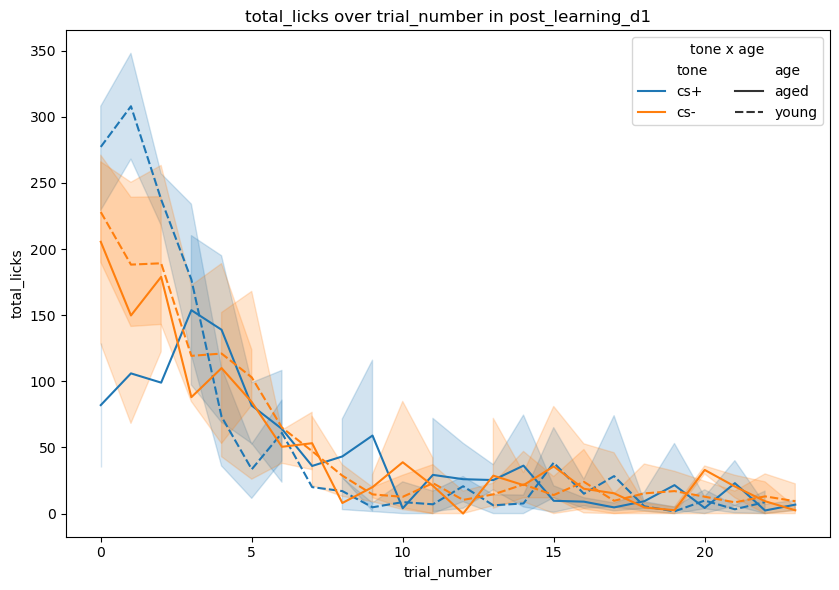

In [29]:
# plot metrics for entire session and entire cohort across trials

session_df.plot_cohort_across_trials(
    # x = 'trial_number',
    # y = 'total_licks',
    # hue = 'tone',
    # style = 'age',
)

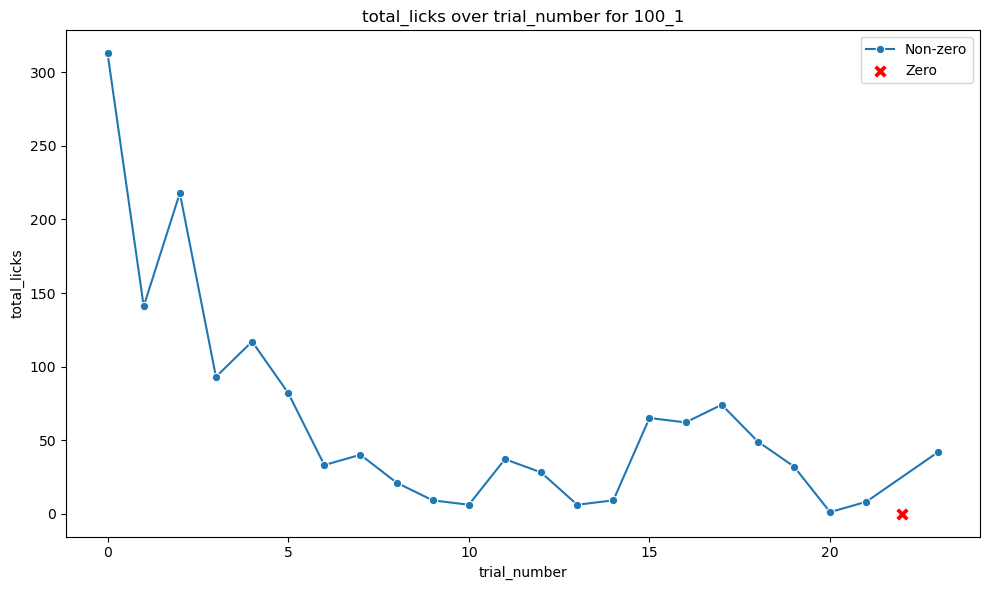

Trials with total_licks == 0 for 100_1: [22]
     trial_number  total_licks
190            22            0


In [7]:
# plotting session data for a single mouse over trials 

session_df.plot_mouse_total_licks_across_trials(
    mouse_id='100_1',        # mouse id to plot
    # y = 'total_licks',     # default
    # x = 'trial_number',    # default
    # title=None,            # default
    # ylabel=None,           # default
    # xlabel=None,           # default
    # figsize=(10, 6)        # default
)

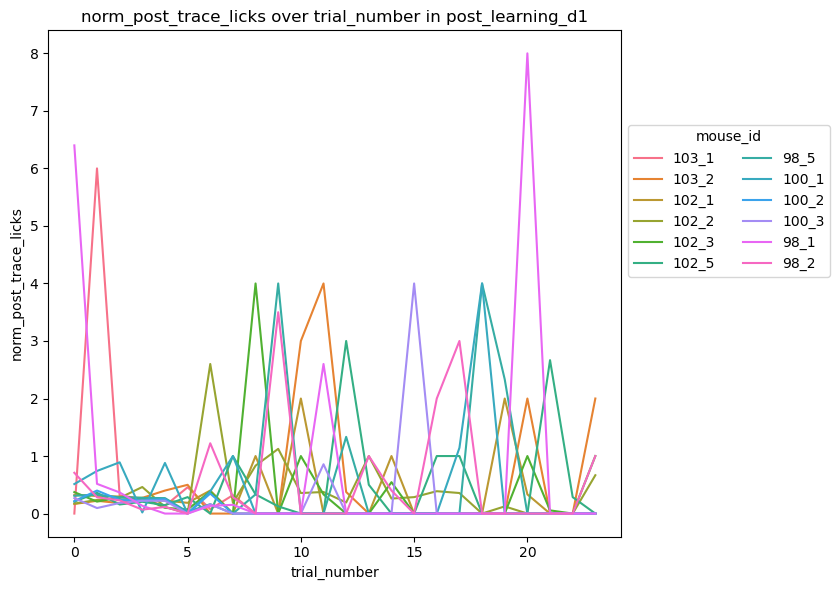

In [8]:
# plotting session data over trials 

session_df.plot_all_mice_metrics_over_trials(
    y='norm_post_trace_licks',
    # x='trial_number',         # default
    # hue='mouse_id',           # default
    # title=None,               # default
    # ylabel=None,              # defaults to y
    # figsize=(10, 5)           # default size
)

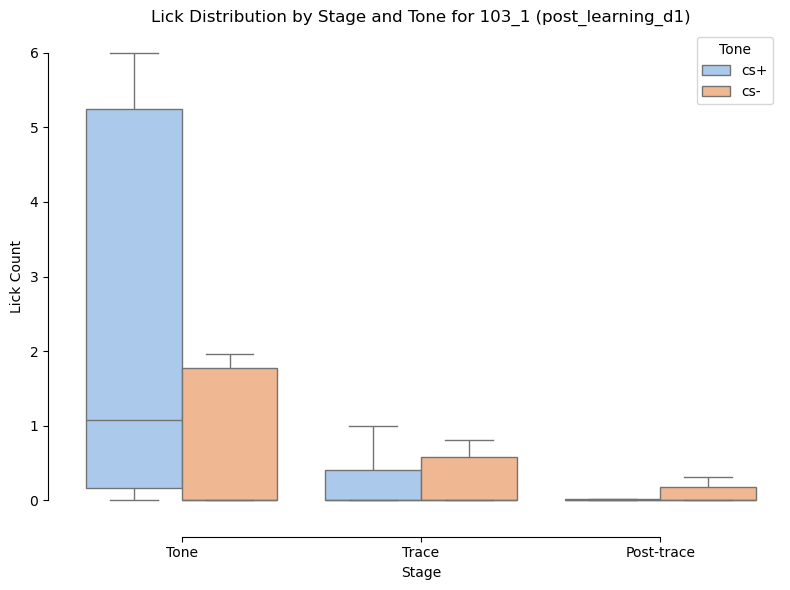

In [36]:
session_df.plot_stage_boxplot_for_single_mouse(
    "103_1", 
    stage_cols={
        # "Pre-tone": "pre_tone_licks",
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",
        "Post-trace": "norm_post_trace_licks",
    },
    hue="tone",
    hue_order=["cs+", "cs-"], 
    palette={"cs+": "#A1C9F4", "cs-": "#FFB482"}
)

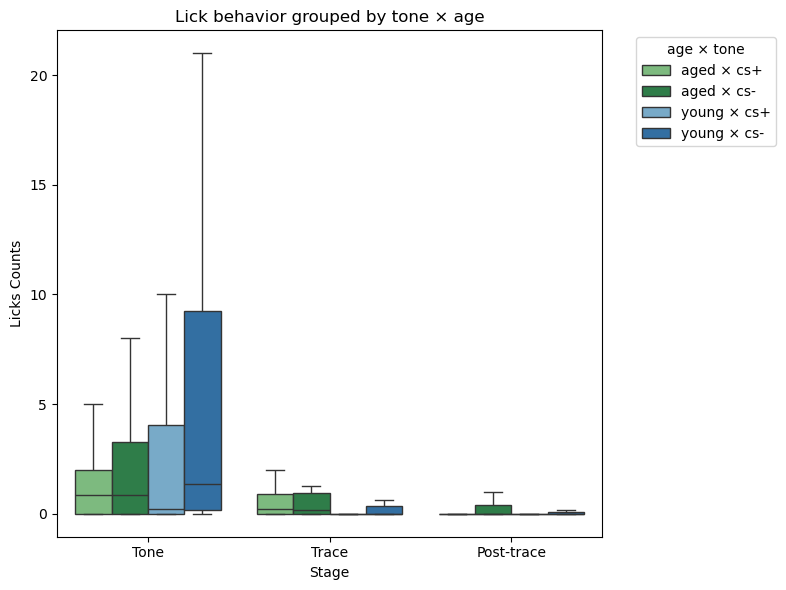

In [25]:
session_df.plot_stage_boxplot_by_group(
    group_vars=["age", "tone"],
    stage_cols={            
        # "Pre-tone": "pre_tone_licks",
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",            
        "Post-trace": "norm_post_trace_licks",
        },
    title="Lick behavior grouped by tone × age",
    ylabel="Licks Counts",
)


In [30]:
session_df.wilcoxon_test_for_condition(
    condition="tone",
    filter_group="age",
    select_group="young",
    testing_metrics="norm_tone_licks",
)

Wilcoxon test between cs- and cs+ among young mice:
Statistic: 692.5, p-value: 0.005284362097040948


In [31]:
session_df.mann_whitney_test_for_age(
    condition="age",
    filter_group="tone",
    select_group="cs-",
    testing_metrics="norm_tone_licks",
)

Mann-Whitney U test between aged and young among cs- mice:
Statistic: 1922.0, p-value: 0.007175157700660386


*  Second part of this notebook shows cohort-level comparison functions

In [136]:
# use 
from tfcrig.helpers.batch import load_sessions_from_folder
from tfcrig import stats

folder_path = r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\try"
folder_data = load_sessions_from_folder(folder_path)

cohort_df = stats.Cohort(folder_data)

In [137]:
# realign trial number: such that trial 0 in the second session will be trial x + 1, where x is the last trial number of the first session

cohort_df.realign_trials_by_session_order([
    "lick_training", "pre_learning", "learning", "post_learning"
])


In [138]:
reward_success_rate = cohort_df.compute_reward_success_rate(groupby_cols=['mouse_id', 'session_id', 'tone', 'airpuff'],
                                                            reward_col="post_trace_licks")
reward_success_rate

,mouse_id,session_id,tone,airpuff,post_trace_licks_success_rate
0,114_1,pre_learning_d10,cs-,puff,35.714286
1,114_1,pre_learning_d11,cs-,puff,12.500000
2,114_3,pre_learning_d10,cs-,puff,7.142857
3,114_3,pre_learning_d11,cs-,puff,8.333333
4,114_5,pre_learning_d10,cs-,puff,14.285714
5,114_5,pre_learning_d11,cs-,puff,8.333333
6,115_1,pre_learning_d10,cs-,puff,28.571429
7,115_1,pre_learning_d11,cs-,puff,25.000000
8,115_2,pre_learning_d10,cs-,puff,71.428571
9,115_2,pre_learning_d11,cs-,puff,20.833333


In [140]:
reward_success_rate.to_csv( r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\reward_success_rate_new.csv", index=False)

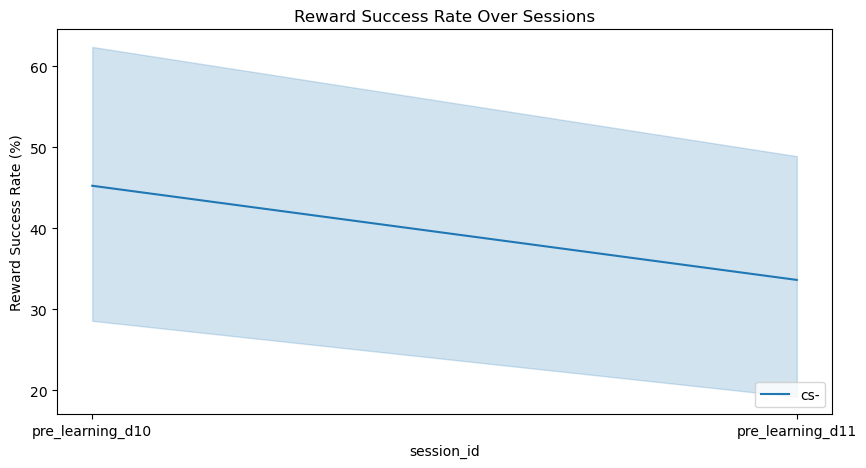

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=reward_success_rate,
    x='session_id',
    y='post_trace_licks_success_rate',
    hue='tone')
plt.title('Reward Success Rate Over Sessions')
plt.ylabel('Reward Success Rate (%)')
plt.legend(loc='lower right')